In [4]:
# Load the dataset
df = pd.read_csv("preprocessed_dataset_NSLKDD.csv")

C:\Users\pappu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 0.9998729886562994

Classification Report:
                 precision    recall  f1-score   support

           back       1.00      1.00      1.00       956
buffer_overflow       1.00      1.00      1.00        30
      ftp_write       1.00      1.00      1.00         8
   guess_passwd       1.00      1.00      1.00        53
           imap       1.00      1.00      1.00        11
        ipsweep       1.00      1.00      1.00      3599
           land       0.82      1.00      0.90        18
     loadmodule       1.00      1.00      1.00         9
       multihop       1.00      1.00      1.00         7
        neptune       1.00      1.00      1.00     41214
           nmap       1.00      1.00      1.00      1493
         normal       1.00      1.00      1.00     67343
           perl       1.00      1.00      1.00         3
            phf       1.00      1.00      1.00         4
            pod       1.00      1.00      1.00       201
      portsweep       1.00      1.

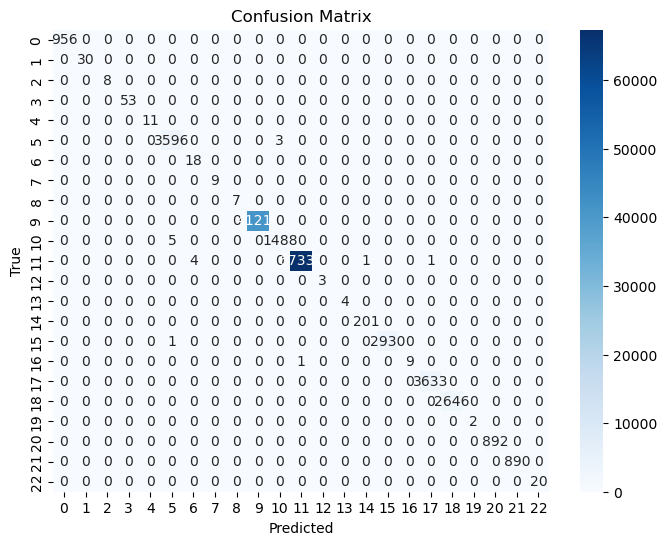

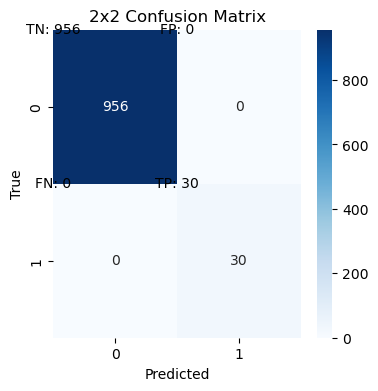

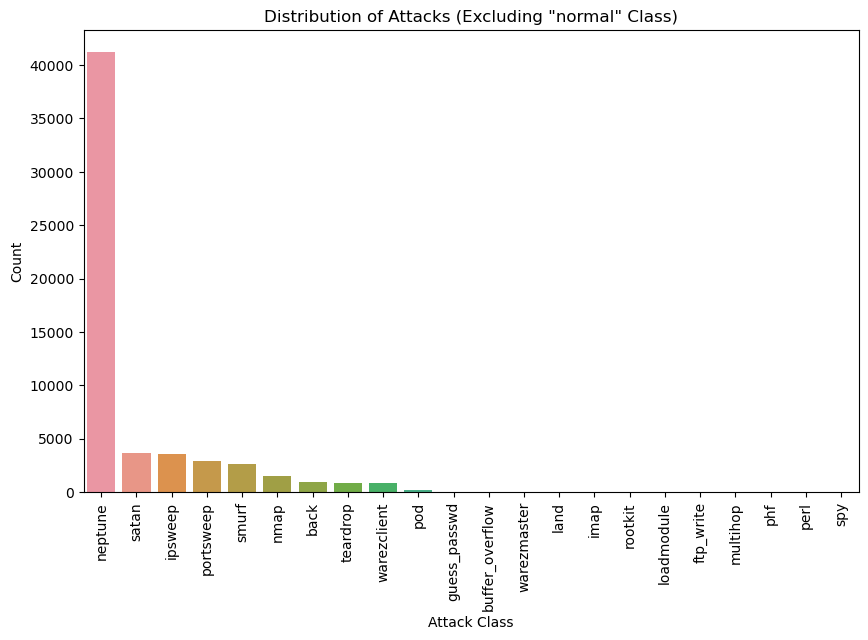

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Create feature matrix X and target vector y
X = df.drop('subclass', axis=1)
y = df['subclass']

# Perform one-hot encoding on the categorical columns in X
categorical_cols = X.select_dtypes(include='object').columns
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names(categorical_cols))
X = pd.concat([X.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Create and train the Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Predict the test set
y_pred = model.predict(X)

# Evaluate the model
accuracy = model.score(X, y)
classification = classification_report(y, y_pred)
confusion = confusion_matrix(y, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot the 2x2 confusion matrix
confusion_2x2 = confusion[:2, :2]  # Extract the 2x2 portion of the confusion matrix
tn, fp, fn, tp = confusion_2x2.ravel()  # Unpack the values of TN, FP, FN, TP

plt.figure(figsize=(4, 4))
sns.heatmap(confusion_2x2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('2x2 Confusion Matrix')
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.show()

# Filter out the "normal" class from the target column
attacks = df[df['subclass'] != 'normal']['subclass']

# Count the occurrences of each attack class
attack_counts = attacks.value_counts()

# Plot the distribution of attacks
plt.figure(figsize=(10, 6))
sns.barplot(x=attack_counts.index, y=attack_counts.values)
plt.xlabel('Attack Class')
plt.ylabel('Count')
plt.title('Distribution of Attacks (Excluding "normal" Class)')
plt.xticks(rotation=90)
plt.show()
